# 1. Install and Import Dependencies


In [7]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [8]:
!cd yolov5 & pip install -r requirements.txt

In [9]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load model

In [10]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\HP Computer/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-10 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [11]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections

In [12]:
img = 'https://vcdn-english.vnecdn.net/2016/11/24/Motorbikestrytoweavetheirwaybe-6460-3530-1479955800_1200x0.jpg'

In [13]:
result= model(img)
result.print()

image 1/1: 732x1100 15 persons, 15 cars, 6 motorcycles, 4 buss, 3 trucks, 1 traffic light, 1 stop sign
Speed: 472.3ms pre-process, 38.1ms inference, 20.3ms NMS per image at shape (1, 3, 448, 640)


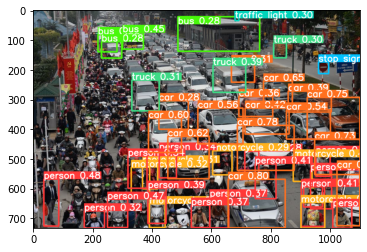

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [15]:
result.show()


In [16]:
np.array(result.render()).shape

(1, 732, 1100, 3)

# 4. Real time detection

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #detect duoc vat
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(result.render()))
    
    if vc2.waitkey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Detec su dung video**
1) import video vao directory va chen ten vao cho trong
<br> cap = cv2.VideoCapture("---")
⠀⠀⠀⠀⠀⠀

# 5. Train from scratch

In [24]:
import uuid  #Unique identifier
import os  #
import time

In [25]:
IMAGES_PATH = os.path.join('data', 'image') #save vao folder/data/image
labels = ['awake','drowsy']
number_imgs = 20


In [30]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Coleting image for {}'.format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Coleting image for {},image number'.format(labels, img_num))
        
        #Anh tu webcam
        ret, frame = cap.read()
         
        #Đặt tên ảnh
        imgname = os.path.join(IMAGES_PATH, label+','+str(uuid.uuid1())+ '.jpg')
        
        #Lưu ảnh vào file
        cv2.imwrite(imgname, frame)
        
        #Render ảnh ra màn hình
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        if vc2.waitkey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
'''Do lam o PC nen loi chua update hinh anh tu cam duoc'''

Coleting image for ['awake', 'drowsy']
Coleting image for ['awake', 'drowsy'],image number


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:799: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [22]:
for label in labels:
    print('Coleting image for {}'.format(labels))
    for img_num in range(number_imgs):
        print('Coleting image for {},image number'.format(labels, img_num))
        
        #Tao unique name va save vao path
        imgname = os.path.join(IMAGES_PATH, label+','+str(uuid.uuid1())+ '.jpg')
        print(imgname)

Coleting image for ['awake', 'drowsy']
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,14253ec1-5b66-11ec-9160-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,14253ec2-5b66-11ec-80d6-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,14253ec3-5b66-11ec-be42-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565d6-5b66-11ec-b5cf-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565d7-5b66-11ec-9696-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565d8-5b66-11ec-9c90-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565d9-5b66-11ec-80b2-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565da-5b66-11ec-acfa-b8ca3aa2a7a1.jpg
Coleting image for ['awake', 'drowsy'],image number
data\image\awake,142565db-5b6

In [29]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [32]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 6. Load Model